<h1><center><span style="color: green;">What is a Neural Network?</span></center></h1>
Neural Networks (NNs) are computer models that simulate the interconnected neuron structure of the human brain. They form one of the basic components in most contemporary machine learning regimes, enabling pattern recognition and data-based decision making.

Every neural network is made up of interlinked levels of nodes known as neurons. Information goes through each node before it is transmitted to the next layer hence this enables a complicated understanding of patterns found within data.

<h1><center><span style="color: green;">Neurons and Perceptrons</span></center></h1>

## **Neurons:**
- The neuron, also known as a unit or a node, is the fundamental unit for any neural network. It is intended to mimic the functions of biological neurons in the human brain which receives inputs, processes them and passes on outputs to next layers of neurons.

    - **Input:** Any information or signal that comes into the neuron.
    - **Weights:** These are coefficients used in scaling input values; each neuron has weights attached to each input.
    - **Bias:** A further variable permitting adjustment of final output by the neuron independent of the inputs.
    - **Activation Function:** This determines whether a given neuron should be activated or not based on its input weighted sum using mathematical function.

## **Perceptron:**

- Perceptron is one of the simplest Artificial neural network architectures.
- It was introduced by Frank Rosenblatt in 1957s.
- It is the simplest type of feedforward neural network, consisting of a single layer of input nodes that are fully connected to a layer of output nodes.
- It can learn the linearly separable patterns. it uses slightly different types of artificial neurons known as threshold logic units (TLU). it was first introduced by McCulloch and Walter Pitts in the 1940s.

A perceptron, the basic unit of a neural network, comprises essential components that collaborate in information processing.

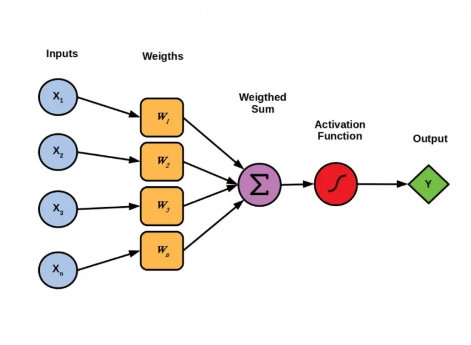

This is the most simple neural network with only one perceptron.
We will understand how perceptron works in deatil step by step.


In [642]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# **PREPARE DATA**
First we need to create some data for our neural network.
- Here I am using the sklearn's make classification function to create a dataset.
- I have aken two featres, and the target column has two labels since it is a binaty classification probelm.

In [668]:

# Generate a binary classification dataset
X, y = make_classification(n_samples = 50, n_features = 2, n_classes = 2, n_clusters_per_class = 1, n_redundant = 0)

The shape of our data is:

In [664]:
X.shape, y.shape

((50, 2), (50,))

Since it is a 2D data we can easily plot our data to see how it looks visually.

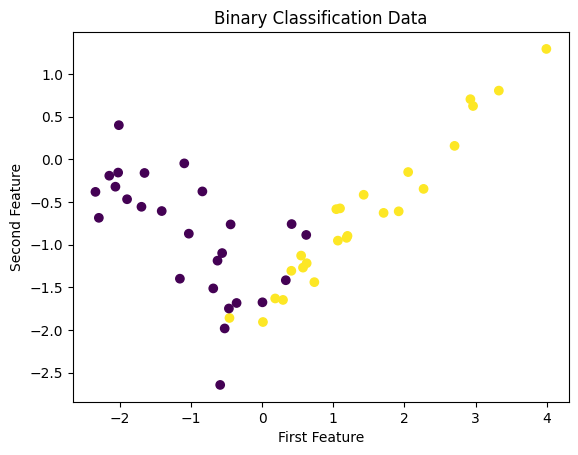

In [669]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.xlabel('First Feature')
plt.ylabel('Second Feature')
plt.title('Binary Classification Data')
plt.show()


So here is our data, we can see that our data is almost linearly separable. Now we do train test split and standardize our data.

# **TRAIN-TEST SPLIT**
Now we will split our data into train and testing sets. We will use the training set to train our data and testing our data to evaluate our model.

In [670]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# **DATA SCALING**
A most important step in model development is to tandardize the data.
We can either use StandardScaler, MinMaxScaler or RobuseScaler to scale our data.
Generally MinMax is used when we know range of our data, whilr Robust is used in case fof outliers.
As these two conditions donot fall in our data so we will use Standard Scaler.

In [671]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **DEFINE THE NETWORK PARAMETERS**
Next we need to define our network parameters that include determining how many hidden layers are we gonna use, what is our input shape, how many nodes do we need in output.

## **INPUT LAYER**
The number of neurons in input layer should be equal to the number of features in our data. For example in our case we have 2 feautres so we will have 2 neurons in the input layer.

## **HIDDEN LAYERS**
### **Number of Hidden Layers**
 There’s no fixed rule for the number of hidden layers. Often, one or two hidden layers are sufficient for most problems. More complex problems might require more layers, but this can lead to overfitting and increased training time.
### **Number of Neurons per Hidden Layer**
 There is no specific rule of thumb for the number of hidden layers in network. Some practices suggest starting with twice the size of the input layer for the number of neurons in the hidden layer.

In [672]:
X_train.shape[1]

2

In [673]:
input_neurons = 2
hidden_layers = 10  
output_neurons = 1 

# **INITIALIZE WEIGHTS AND BIASES**
Now we need to initialize the weights and biases.
We have to set two matrices one for the betwen the input and hidden layer and one for between hidden and output layer.

The first weight matrix size will be the input size x hidden size that is: 2x10, while the second weight matrix will be 10x1.

In [674]:
np.random.seed(42)
w1 = np.random.randn(input_neurons, hidden_layers)
b1 = np.zeros(hidden_layers)
w2 = np.random.randn(hidden_layers, output_neurons)
b2 = np.zeros(output_neurons)

# **FEED FORWARD**
In a feedforward neural network, the feedforward process involves passing input data through the network layers to generate predictions or outputs. 

### **Receiving Input**
The input layer receives the feature data. Each neuron in this layer represents one feature of the input data.
### **Linear Transformation:** 
Each neuron in the hidden layer computes a weighted sum of the inputs it receives.

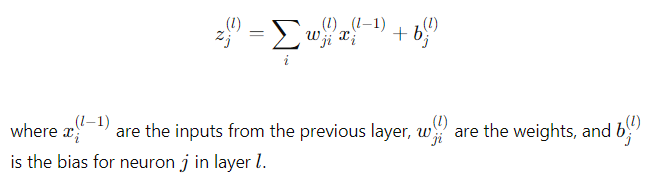

The weighted sum is then passed through an activation function to introduce non-linearity into the model. Common activation functions include:

### **Output Layer**
Similar to hidden layers, neurons in the output layer perform a weighted sum of their inputs, but this is the final transformation before generating predictions:

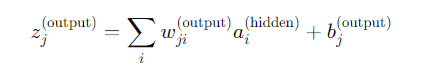

In [675]:
def feed_forward(X):
    global a1, a2
    z1 = np.dot(X, w1) + b1
    a1 = activation(z1)
    z2 =  np.dot(a1, w2) + b2
    a2 = activation(z2)
    return a2

# **ACTIVATION FUNCTION**
In an Artificial Neural Network (ANN), activation functions play a crucial role in introducing non-linearity into the network. Without activation functions, the entire network would essentially be a linear transformation, regardless of the number of layers.

Activation functions help the network create complex decision boundaries. For classification tasks, this means the network can separate classes in more sophisticated ways than simple linear boundaries.


## **Linear Transformation**
After the weighted sum has been calculated the activation function is applied on the sum and the nthe output is passed to the next layer.

## **Types of Activation Functions:**
We have various types of activation functions which are used based on their use case.

### **1. Sigmoid Function**

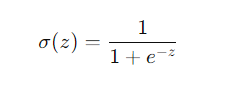

- The output range is (0, 1)
- Often used in the output layer of model for binary classification.

### **2. Softmax Function**

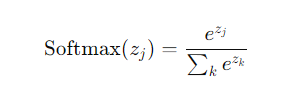

- The output range is (0, 1) for each class.
- Used in the output layer of multi-class classification problems to represent class probabilities.

### **3. ReLu Function**

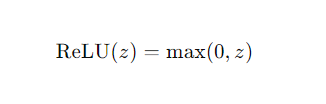

- The output range is [0, inf)
- Most commonly used in hidde layers.

### **Tanh Function**

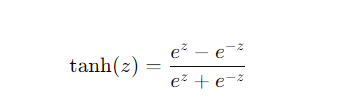

- The output range is (-1, 1)
- Provides outputs centered around zero, which can make learning faster and more effective than sigmoid.

Here because our data is binary so we will use sigmoid activation function. Here is the code:

In [676]:
def activation(x):
    func = 1 / (1 + np.exp(-x))
    return func

We are also writing code to calculate the derivative of activation function, because we will be neeing that in future.

In [677]:
def activation_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# **BACKWARD PROPAGATION**
Backpropagation is the algorithm used to train neural networks by adjusting the weights based on the error at the output. It works by calculating the gradient of the loss function with respect to each weight through the chain rule of calculus, and then updating the weights to minimize the loss.

- Compute the gradient of the loss with respect to each weight in the network.
- Update the weights using gradient descent to minimize the loss.
- Weights are updated using this rule

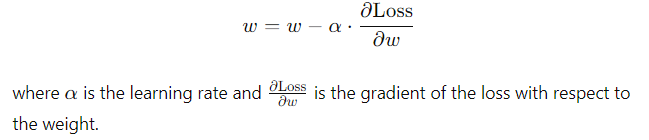

During each pass:
1. Loss is calculated using
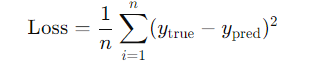
2. Then the partial derivatives are calcualed with respect to the weights after.
3. At the end we have updated weights that are again used for next epoch.

In [678]:
def backward_propagation(x, y, l_rate):
    global w1, b1, w2, b2
    n = y.shape[0]
    
    # Compute gradients
    derivative_z2 = a2 - y.reshape(-1, 1)
    derivative_w2 = np.dot(a1.T, derivative_z2) / n
    derivative_b2 = np.sum(derivative_z2, axis=0) / n
    
    derivative_z1 = np.dot(derivative_z2, w2.T) * activation_derivative(a1)
    derivative_w1 = np.dot(x.T, derivative_z1) / n
    derivative_b1 = np.sum(derivative_z1, axis=0) / n
    
    # Update weights and biases
    w2 -=  l_rate * derivative_w2
    b2 -=  l_rate * derivative_b2
    w1 -=  l_rate * derivative_w1
    b1 -=  l_rate * derivative_b1


# **LOSS FUNCTION**
The loss function calculates the error between the predicted output and the actual output.
Depending on the type of problem (classification, regression, etc.), different loss functions are used. For example:
1. Mean Squared Error (MSE): Used in regression tasks. It calculates the squared difference between predicted and actual values.
2. Cross-Entropy Loss (Log Loss): Commonly used in classification tasks. It measures the difference between the predicted probability distribution and the actual labels.

## **Types of Loss Functions**
### **Regression Loss Functions**
1. Mean Squared Error (MSE):

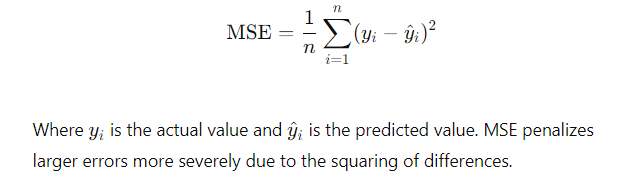

2. Mean Absolute Error (MAE):

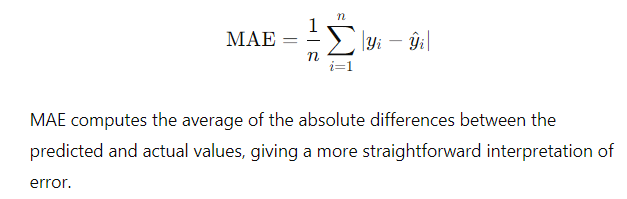

### **Classification Loss Functions**
1. Binary Cross-Entropy Loss:

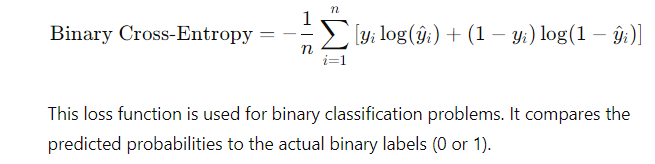

2. Categorical Cross-Entropy Loss:

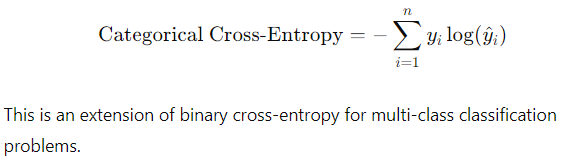


Here we are using bianry_cross_entropy loss.

In [679]:
def loss_func(y_true, y_pred, l_rate):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, l_rate, 1 - epsilon)
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

# **MODEL TRAINING**
Training an Artificial Neural Network (ANN) involves a series of processes aimed at adjusting the network's parameters (weights and biases) to minimize the error between the predicted outputs and the actual target values. The ultimate goal of training is to make the network perform well on unseen data by learning from the provided training data.

We will use the training data to train our model.

In [680]:
def train(X_train, y_train, epochs, l_rate):
    model_loss = []
    accuracy = []
    for epoch in range(epochs):
        y_pred = feed_forward(X_train)
        
        loss = loss_func(y_train, y_pred, l_rate)
        model_loss.append(loss)
        # Calculate accuracy
        y_pred_class = (y_pred > 0.5).astype(int).flatten()
        accuracy_now = np.mean(y_train == y_pred_class)
        accuracy.append(accuracy_now)
        backward_propagation(X_train, y_train, l_rate)
    return model_loss, accuracy

In [681]:
# Train the neural network
losses, accuracies = train(X_train, y_train, 10000, 0.02)

In [682]:
print(f'The final weights are \nw1:\n{w1} \nw2\n{w2} \nb1\n{b1} \nb2\n{b2}')

The final weights are 
w1:
[[ 4.32113072 -1.07557206  1.46242837  0.43863837 -1.35056687 -0.3966793
   1.12742359  2.39321219 -2.51358238  0.92403382]
 [-2.1539956  -0.07428027 -0.10056236 -1.63063172 -1.33599382 -0.46038008
  -0.93768182 -0.3714998  -0.09056581 -1.59098495]] 
w2
[[ 3.92372379]
 [-1.45195913]
 [ 0.8583751 ]
 [-0.0775096 ]
 [-1.05702356]
 [-0.56907122]
 [ 0.37640553]
 [ 1.73390478]
 [-2.58702048]
 [ 0.87898538]] 
b1
[-1.40593235  0.23994466 -0.26069289  0.1891275   0.28356797  0.08108333
  0.0106309  -0.54591019  0.43825151 -0.18655825] 
b2
[-1.3671109]


# **MODEL EVALUATION**
Now we will evalute our model by using the final weights to calculate the outptu of the test sets.
We will compare the predicted outputs with the actual outputs and calculate the accuracy.

In [683]:
# Evaluate on test data
y_test_pred = forward(X_test)
y_test_pred = (y_test_pred > 0.5).astype(int).flatten()

In [684]:
y_test_pred

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 1])

In [685]:
accuracy = np.mean(y_test == y_test_pred)
print(f'Test Accuracy: {accuracy}')

Test Accuracy: 1.0
